In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plusmodules as pm
import seaborn as sns
from scipy.stats import randint

In [ ]:
df = pd.read_csv("..\data\diabetes_binary.csv")
df = df.sample(frac=1, random_state=44).reset_index(drop=True)
df.shape

(70692, 22)

In [ ]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,30.0,0.0,0.0,11.0,5.0,6.0
1,0.0,0.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,5.0,7.0
2,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,6.0,8.0
3,0.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
4,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0


In [ ]:
df['Diabetes_binary'].unique()

array([1., 0.])

In [ ]:
y=df['Diabetes_binary']
X=df.drop('Diabetes_binary', axis=1)

In [ ]:
X.shape,y.shape

((70692, 21), (70692,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
X.shape,y.shape

((70692, 21), (70692,))

### Hyperparameter tuning of Random Forest

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

rfc = RandomForestClassifier()

param_dist = {'n_estimators': sp_randint(50, 500),
              'max_depth': sp_randint(2, 15),
              'max_features':sp_randint(2, 21),
              'min_samples_leaf': sp_randint(1, 25)}

rsearch = RandomizedSearchCV(rfc, param_distributions=param_dist, cv=3, scoring='neg_log_loss',
                            n_jobs=-1,  n_iter=50, random_state=2)

#rsearch.fit(X, y)
#rsearch.best_params_

In [ ]:
rsearch.best_params_ = {'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 3, 'n_estimators': 483}

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import log_loss

rfc = RandomForestClassifier(**rsearch.best_params_, random_state=42)
rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Accuracy Score - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('LogLoss - Train: ', log_loss(y_train, y_train_prob))
print('Classification Report - Train: ', '\n', classification_report(y_train,y_train_pred))
print('\n')
print('Accuracy Score - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('LogLoss - Test: ', log_loss(y_test, y_test_prob))
print('Classification Report - Test: ', '\n', classification_report(y_test,y_test_pred))

Accuracy Score - Train:  0.7813636731064586
AUC - Train:  0.8612366294659792
LogLoss - Train:  0.4659359810246157
Classification Report - Train:  
               precision    recall  f1-score   support

         0.0       0.81      0.74      0.77     24739
         1.0       0.76      0.82      0.79     24745

    accuracy                           0.78     49484
   macro avg       0.78      0.78      0.78     49484
weighted avg       0.78      0.78      0.78     49484



Accuracy Score - Test:  0.750377216144851
AUC - Test:  0.827090245261393
LogLoss - Test:  0.5065215762613304
Classification Report - Test:  
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10607
         1.0       0.73      0.79      0.76     10601

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



### Random Forest after PCA

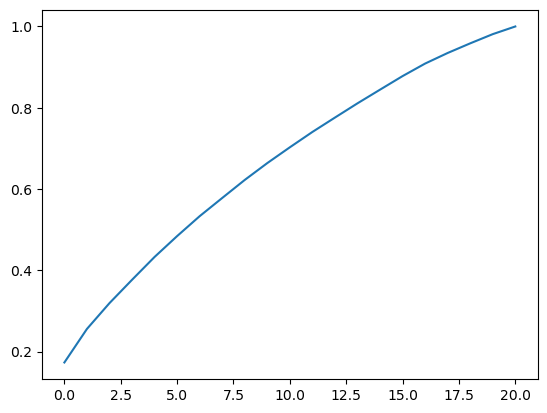

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

X_pc=pca.fit_transform(X)

pca.explained_variance_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

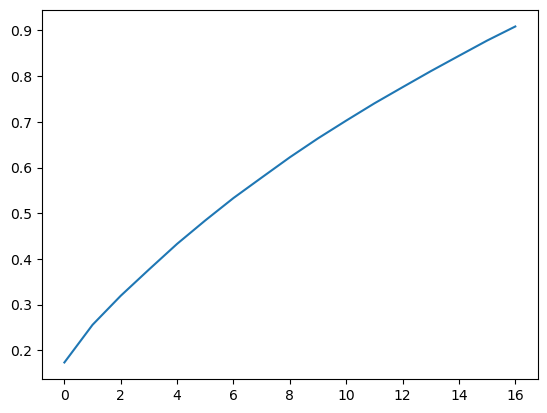

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.90)

X_pc=pca.fit_transform(X)

pca.explained_variance_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [ ]:
X_pc.shape

(70692, 17)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.90)

X_train_pc=pca.fit_transform(X_train)
X_test_pc=pca.transform(X_test)

In [ ]:
rfc = RandomForestClassifier()

param_dist = {'n_estimators': sp_randint(50, 500),
              'max_depth': sp_randint(2, 20),
              'max_features':sp_randint(2, 19),
              'min_samples_leaf': sp_randint(1, 25)}

rsearch = RandomizedSearchCV(rfc, param_distributions=param_dist, cv=3,
            scoring='neg_log_loss',  n_jobs=-1, n_iter=50, random_state=2)

#rsearch.fit(X_pc, y)
#rsearch.best_params_

In [ ]:
rsearch.best_params_ = {'max_depth': 11, 'max_features': 9, 'min_samples_leaf': 18, 'n_estimators': 299}

In [ ]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=42)
rfc.fit(X_train_pc, y_train)

y_train_pred = rfc.predict(X_train_pc)
y_test_pred = rfc.predict(X_test_pc)

y_train_prob = rfc.predict_proba(X_train_pc)[:,1]
y_test_prob = rfc.predict_proba(X_test_pc)[:,1]

print('Accuracy Score - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('LogLoss - Train: ', log_loss(y_train, y_train_prob))
print('Classification Report - Train: ', '\n', classification_report(y_train,y_train_pred))
print('\n')
print('Accuracy Score - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('LogLoss - Test: ', log_loss(y_test, y_test_prob))
print('Classification Report - Test: ', '\n', classification_report(y_test,y_test_pred))

Accuracy Score - Train:  0.7851426723789507
AUC - Train:  0.8743030309782278
LogLoss - Train:  0.45000288826775653
Classification Report - Train:  
               precision    recall  f1-score   support

         0.0       0.82      0.73      0.77     24739
         1.0       0.76      0.84      0.80     24745

    accuracy                           0.79     49484
   macro avg       0.79      0.79      0.78     49484
weighted avg       0.79      0.79      0.78     49484



Accuracy Score - Test:  0.7475480950584685
AUC - Test:  0.822385848374483
LogLoss - Test:  0.5124689414034646
Classification Report - Test:  
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.73     10607
         1.0       0.72      0.80      0.76     10601

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



#### Tuning PCA components along with Model Paramters

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rfc', RandomForestClassifier())])

param_dist = {'pca__n_components': randint(10,22, 1),
              'rfc__n_estimators': sp_randint(50, 500),
              'rfc__max_depth': sp_randint(2, 20),
              'rfc__min_samples_leaf': sp_randint(1, 25)}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
n_iter=5, cv=3, scoring='roc_auc', random_state=42)

#random_search.fit(X, y)
#print("Best Hyperparameters:", random_search.best_params_)

In [ ]:
best_params_ = {'max_depth':12, 'min_samples_leaf':24, 'n_estimators':422}

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 21)

X_train_pc=pca.fit_transform(X_train)
X_test_pc=pca.transform(X_test)

rfc = RandomForestClassifier(**best_params_, random_state=42)
rfc.fit(X_train_pc, y_train)

y_train_pred = rfc.predict(X_train_pc)
y_test_pred = rfc.predict(X_test_pc)

y_train_prob = rfc.predict_proba(X_train_pc)[:,1]
y_test_prob = rfc.predict_proba(X_test_pc)[:,1]

print('Accuracy Score - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('LogLoss - Train: ', log_loss(y_train, y_train_prob))
print('Classification Report - Train: ', '\n', classification_report(y_train,y_train_pred))
print('\n')
print('Accuracy Score - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('LogLoss - Test: ', log_loss(y_test, y_test_prob))
print('Classification Report - Test: ', '\n', classification_report(y_test,y_test_pred))

Accuracy Score - Train:  0.7843545388408374
AUC - Train:  0.8764521617813636
LogLoss - Train:  0.46186335643874765
Classification Report - Train:  
               precision    recall  f1-score   support

         0.0       0.82      0.72      0.77     24739
         1.0       0.75      0.85      0.80     24745

    accuracy                           0.78     49484
   macro avg       0.79      0.78      0.78     49484
weighted avg       0.79      0.78      0.78     49484



Accuracy Score - Test:  0.7475952470765749
AUC - Test:  0.823353069564164
LogLoss - Test:  0.5142231611864048
Classification Report - Test:  
               precision    recall  f1-score   support

         0.0       0.79      0.68      0.73     10607
         1.0       0.72      0.81      0.76     10601

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



### Applying SVD for dimensionality reduction

In [ ]:
X.shape

(70692, 21)

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=21, random_state=42)
svd.fit(X)

TruncatedSVD(n_components=21, random_state=42)

In [ ]:
count=0
for index, cumsum in enumerate(np.cumsum(svd.explained_variance_ratio_)):
    if cumsum<=0.95:
        count+=1
    else:
        break

print(count)

18


In [ ]:
svd = TruncatedSVD(n_components=18, random_state=42)
svd.fit(X_train)

X_trains_sv = svd.transform(X_train)
X_tests_sv = svd.transform(X_test)

In [ ]:
X_trains_sv.shape

(49484, 18)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [ ]:
svd = TruncatedSVD(n_components=18, random_state=42)
svd.fit(X)
X_sv = svd.transform(X)

In [ ]:
param_dist = {'n_estimators': sp_randint(50, 500),
              'max_depth': sp_randint(2, 15),
              'max_features':sp_randint(2, 18),
              'min_samples_leaf': sp_randint(1, 25)}

rsearch = RandomizedSearchCV(rfc, param_distributions=param_dist, cv=3,
    scoring='neg_log_loss',  n_jobs=-1, n_iter=50, random_state=2, return_train_score=True)

#rsearch.fit(X_sv, y)
#rsearch.best_params_

In [ ]:
rsearch.best_params_ = {'max_depth': 13, 'max_features': 7, 'min_samples_leaf': 16, 'n_estimators': 369}

In [ ]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=42)
rfc.fit(X_trains_sv, y_train)

y_train_pred = rfc.predict(X_trains_sv)
y_test_pred = rfc.predict(X_tests_sv)

y_train_prob = rfc.predict_proba(X_trains_sv)[:,1]
y_test_prob = rfc.predict_proba(X_tests_sv)[:,1]

print('Accuracy Score - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('LogLoss - Train: ', log_loss(y_train, y_train_prob))
print('Classification Report - Train: ', '\n', classification_report(y_train,y_train_pred))
print('\n')
print('Accuracy Score - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('LogLoss - Test: ', log_loss(y_test, y_test_prob))
print('Classification Report - Test: ', '\n', classification_report(y_test,y_test_pred))

Accuracy Score - Train:  0.8011478457683292
AUC - Train:  0.8942261889821799
LogLoss - Train:  0.4288901465976324
Classification Report - Train:  
               precision    recall  f1-score   support

         0.0       0.84      0.75      0.79     24739
         1.0       0.77      0.85      0.81     24745

    accuracy                           0.80     49484
   macro avg       0.80      0.80      0.80     49484
weighted avg       0.80      0.80      0.80     49484



Accuracy Score - Test:  0.7479724632214259
AUC - Test:  0.8225249299418514
LogLoss - Test:  0.512554411902829
Classification Report - Test:  
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.73     10607
         1.0       0.72      0.80      0.76     10601

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208

